<a href="https://colab.research.google.com/github/ARPITA-SARKER/CVPR/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)= tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
classes =['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

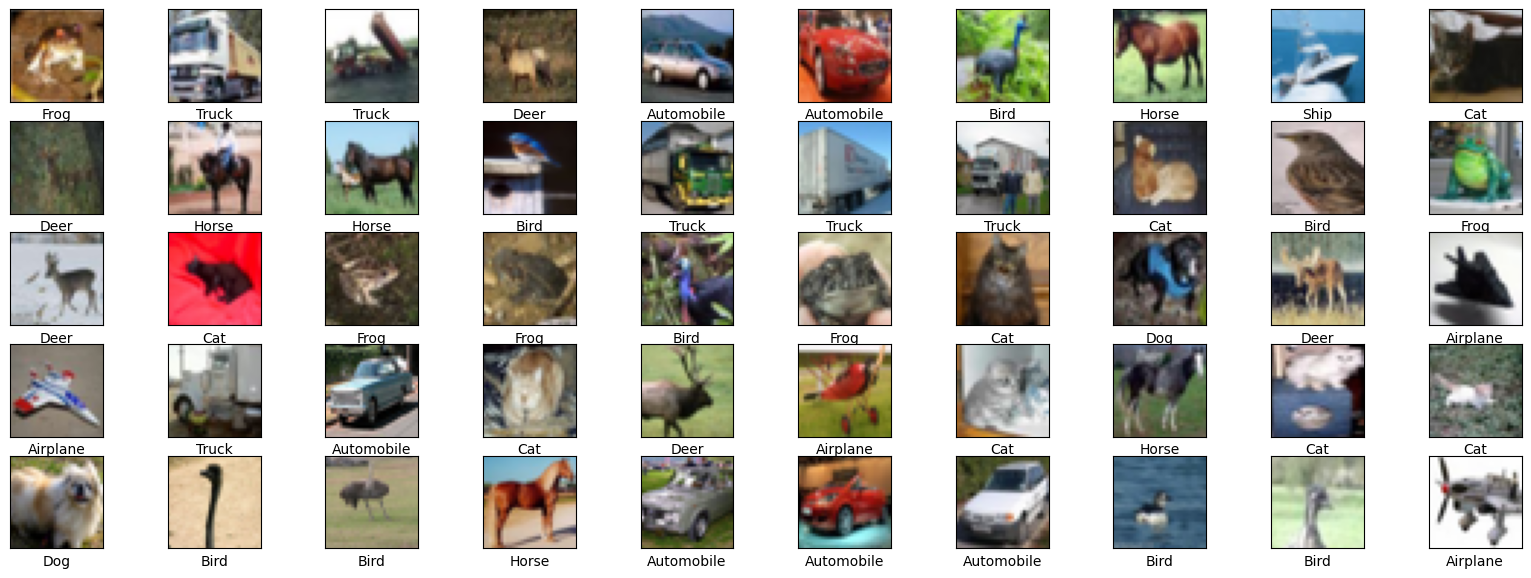

In [4]:
plt.figure(figsize=(20,7))
for i in range (50):
  plt.subplot(5,10,i+1)
  plt.imshow(train_images[i])
  plt.xlabel(classes[train_labels[i][0]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [5]:
train_images, test_images= train_images/255, test_images/255

In [12]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [14]:
model.compile(
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    #optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    optimizer=  tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)

In [17]:
h= model.fit(x=train_images, y =train_labels, epochs=10, validation_split=0.3,batch_size=32)

Epoch 1/10
1094/1094 [==============================] - 55s 50ms/step - loss: 2.1804 - accuracy: 0.0790 - val_loss: 2.0194 - val_accuracy: 0.0851
Epoch 2/10
1094/1094 [==============================] - 53s 49ms/step - loss: 1.8868 - accuracy: 0.1099 - val_loss: 1.7665 - val_accuracy: 0.0718
Epoch 3/10
1094/1094 [==============================] - 50s 45ms/step - loss: 1.6641 - accuracy: 0.1035 - val_loss: 1.5973 - val_accuracy: 0.0762
Epoch 4/10
1094/1094 [==============================] - 50s 46ms/step - loss: 1.5309 - accuracy: 0.1003 - val_loss: 1.5012 - val_accuracy: 0.1054
Epoch 5/10
1094/1094 [==============================] - 51s 47ms/step - loss: 1.4439 - accuracy: 0.1003 - val_loss: 1.4092 - val_accuracy: 0.0854
Epoch 6/10
1094/1094 [==============================] - 50s 45ms/step - loss: 1.3779 - accuracy: 0.0981 - val_loss: 1.3638 - val_accuracy: 0.1255
Epoch 7/10
1094/1094 [==============================] - 52s 47ms/step - loss: 1.3184 - accuracy: 0.0982 - val_loss: 1.3099 -

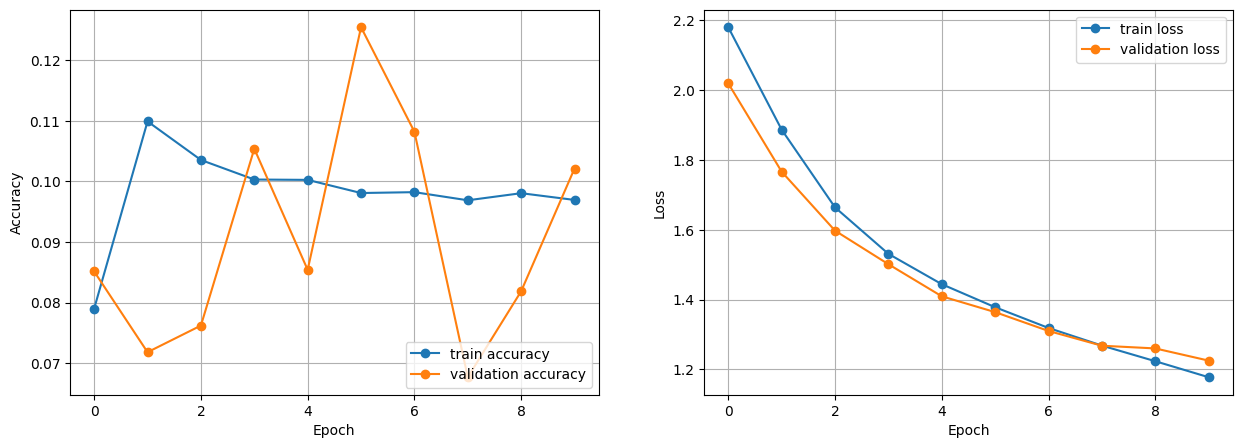

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
model.compile(
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    #optimizer=  tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)

In [21]:
h= model.fit(x=train_images, y =train_labels, epochs=10, validation_split=0.3,batch_size=32)

Epoch 1/10
1094/1094 [==============================] - 53s 47ms/step - loss: 1.2059 - accuracy: 0.5722 - val_loss: 1.2094 - val_accuracy: 0.5739
Epoch 2/10
1094/1094 [==============================] - 53s 48ms/step - loss: 1.0849 - accuracy: 0.6152 - val_loss: 1.1079 - val_accuracy: 0.6123
Epoch 3/10
1094/1094 [==============================] - 55s 50ms/step - loss: 0.9782 - accuracy: 0.6547 - val_loss: 1.0484 - val_accuracy: 0.6384
Epoch 4/10
1094/1094 [==============================] - 49s 45ms/step - loss: 0.8975 - accuracy: 0.6843 - val_loss: 1.0341 - val_accuracy: 0.6417
Epoch 5/10
1094/1094 [==============================] - 60s 55ms/step - loss: 0.8187 - accuracy: 0.7121 - val_loss: 1.0329 - val_accuracy: 0.6488
Epoch 6/10
1094/1094 [==============================] - 57s 52ms/step - loss: 0.7528 - accuracy: 0.7357 - val_loss: 1.0126 - val_accuracy: 0.6607
Epoch 7/10
1094/1094 [==============================] - 51s 47ms/step - loss: 0.6957 - accuracy: 0.7515 - val_loss: 0.9978 -

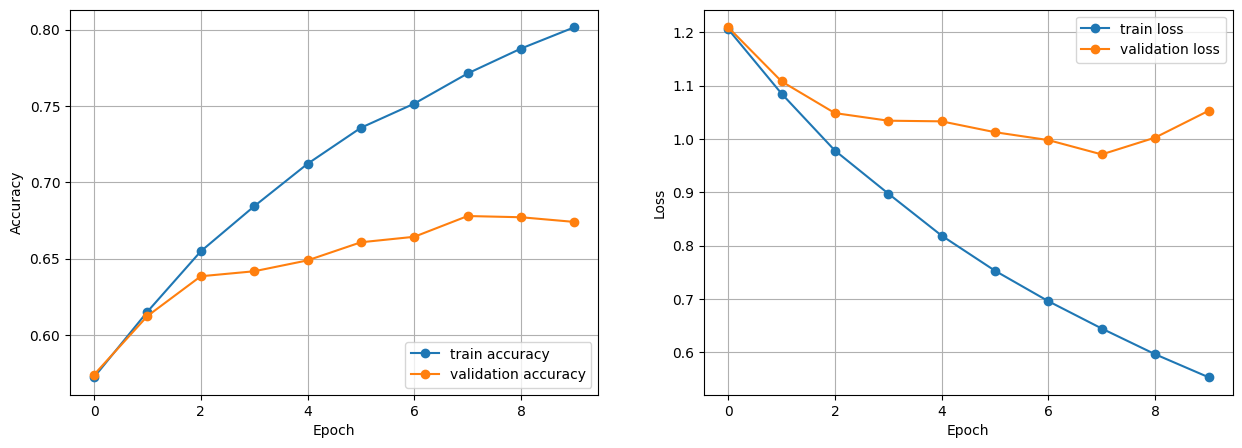

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [24]:
model.compile(
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=  tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['accuracy']
)

In [25]:
h= model.fit(x=train_images, y =train_labels, epochs=10, validation_split=0.3,batch_size=32)

Epoch 1/10
1094/1094 [==============================] - 50s 45ms/step - loss: 2.1664 - accuracy: 0.2779 - val_loss: 2.1233 - val_accuracy: 0.2348
Epoch 2/10
1094/1094 [==============================] - 51s 47ms/step - loss: 1.8512 - accuracy: 0.3344 - val_loss: 1.8142 - val_accuracy: 0.3380
Epoch 3/10
1094/1094 [==============================] - 48s 44ms/step - loss: 1.8103 - accuracy: 0.3368 - val_loss: 1.8113 - val_accuracy: 0.3710
Epoch 4/10
1094/1094 [==============================] - 48s 44ms/step - loss: 1.8108 - accuracy: 0.3363 - val_loss: 1.7746 - val_accuracy: 0.3398
Epoch 5/10
1094/1094 [==============================] - 50s 45ms/step - loss: 1.7815 - accuracy: 0.3512 - val_loss: 1.7442 - val_accuracy: 0.3119
Epoch 6/10
1094/1094 [==============================] - 48s 44ms/step - loss: 1.7659 - accuracy: 0.3596 - val_loss: 1.7259 - val_accuracy: 0.3877
Epoch 7/10
1094/1094 [==============================] - 52s 47ms/step - loss: 1.7524 - accuracy: 0.3630 - val_loss: 2.1769 -

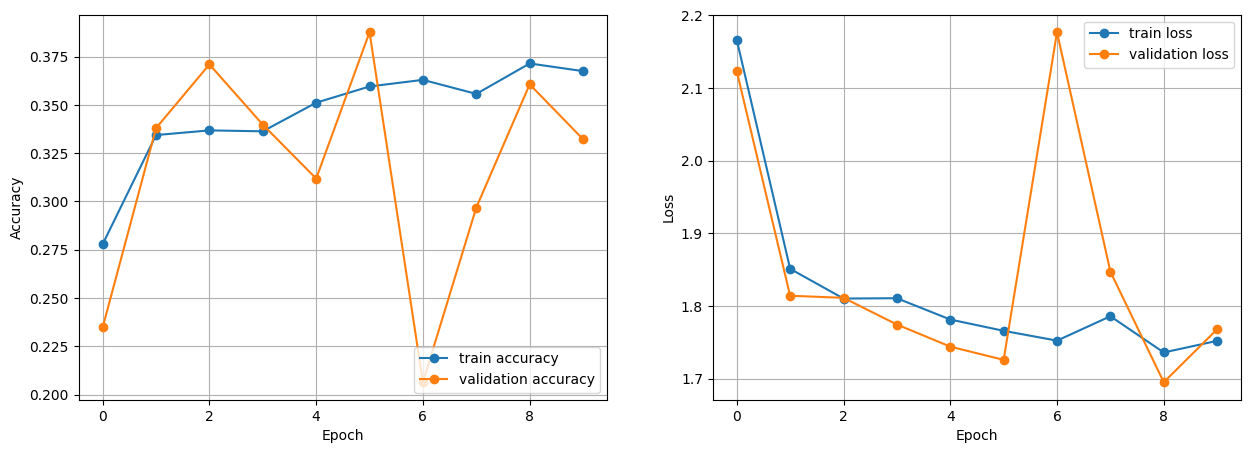

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()